# 합성곱 신경망 (Convolutional Neural Networks) 

컴퓨터 비전 애플리케이션에서 주로 활용되는 신경망  
컨브넷이라고도 불린다.  

합성곱 연산은 feature map 으로 불리는 3D 텐서(높이, 너비, 채널)에 적용된다.  
RGB 이미지는 3개의 컬러 채널을 가져 채널 축의 차원이 3이다.   

Conv2D( output_depth, (window_height, window_width) )  

In [1]:
from keras import layers, models

model = models.Sequential()
# patch size = 3 * 3
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
# filter의 수 = 64
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Conv2D, MaxPooling2D 층의 출력은 3D 텐서 (높이, 너비, 채널) 이다.  
최종적으로 예측하고자 하는 라벨은 1D 벡터이므로 3D 출력을 1D 텐서로 펼쳐야함  
-> 따라서 Flatten() 층을 추가하여 3D 텐서를 1D 텐서로 변환

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 34s 36ms/step - loss: 0.3917 - accuracy: 0.8745
Epoch 2/5
938/938 [==============================] - 40s 42ms/step - loss: 0.0495 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0326 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0235 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0192 - accuracy: 0.9936


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0405 - accuracy: 0.9891


In [6]:
test_acc

0.9890999794006348

In [7]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3,3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3,3), activation='relu'))

In [8]:
model_no_max_pool.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


## 소규모 데이터셋에서 컨브넷 훈련

### 기본 구성

In [9]:
import os, shutil

In [ ]:
original_dataset_dir = "./datasets/dogs-vs-cats/train"

base_dir = "./datasets/cats_and_dogs_small"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

val_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(val_cats_dir)

val_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(val_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
original_dataset_dir = "./datasets/dogs-vs-cats/train"
base_dir = "./datasets/cats_and_dogs_small"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(validation_dir, 'cats')
val_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

#### 네트워크 구성

In [11]:
from keras import layers, models

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [14]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

#### 데이터 전처리

데이터는 네트워크에 주입되려면 **부동 소수 타입의 텐서**로 전처리되어 있어야 함  

jpeg 파일  
1. 사진 파일을 읽는다.  
2. jpeg 콘텐츠를 rgb 픽셀 값으로 디코딩  
3. 부동 소수 타입의 텐서로 변환  
4. 픽셀 값의 스케일을 \[0,1\]로 조정  

이를 위한 전처리 모듈이 keras.preprocessing.image 에 들어있다.  

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # 모든 이미지를 150 * 150크기로 변경
    batch_size=20,
    class_mode='binary'  # 이진 레이블로 설정 ( binary crossentropy 손실을 사용하기 위해 )
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
# data : ( batch samples, height, width, channel )
# label : ( batch samples, )
for data_batch, labels_batch in validation_generator:
    print('batch data size:', data_batch.shape)
    print('batch label size:', labels_batch.shape)
    break

batch data size: (20, 150, 150, 3)
batch label size: (20,)


#### batch generator 를 이용한 모델 훈련

fit_generator 메서드 : fit 메서드와 동일. 다만 데이터 제너레이터를 사용 가능  

<br>

첫번째 매개변수 : 입력과 타깃의 배치를 계속 반환하는 파이썬 제너레이터   
steps_per_epoch : 얼마나 많은 샘플을 뽑을 것인지  
validation_data : 데이터 제너레이터 or 넘파이 배열의 튜플  

In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 45s 450ms/step - loss: 0.6262 - acc: 0.6455 - val_loss: 0.7180 - val_acc: 0.5780
Epoch 2/30
100/100 [==============================] - 42s 423ms/step - loss: 0.5910 - acc: 0.6845 - val_loss: 0.6204 - val_acc: 0.6490
Epoch 3/30
100/100 [==============================] - 40s 404ms/step - loss: 0.5580 - acc: 0.7150 - val_loss: 0.5827 - val_acc: 0.6820
Epoch 4/30
100/100 [==============================] - 40s 404ms/step - loss: 0.5269 - acc: 0.7295 - val_loss: 0.6539 - val_acc: 0.6460
Epoch 5/30
100/100 [==============================] - 39s 388ms/step - loss: 0.5098 - acc: 0.7445 - val_loss: 0.5752 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 46s 459ms/step - loss: 0.4832 - acc: 0.7650 - val_loss: 0.5868 - val_acc: 0.6790
Epoch 7/30
100/100 [==============================] - 52s 518ms/step - loss: 0.4637 - acc: 0.7740 - val_loss: 0.5583 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 4

In [19]:
# 모델 저장
model.save('cats_and_dogs_small_1.h5')

#### 훈련 정확도, 손실 그래프 

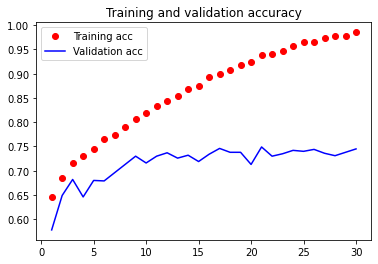

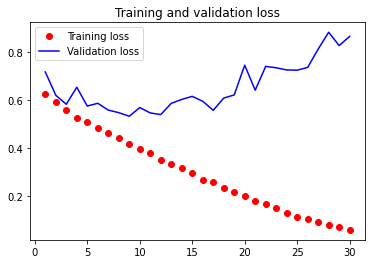

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 데이터 증식

In [21]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

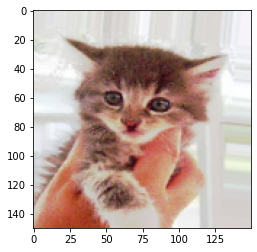

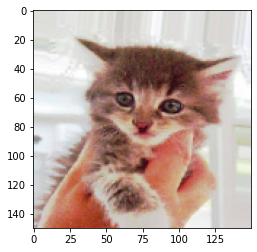

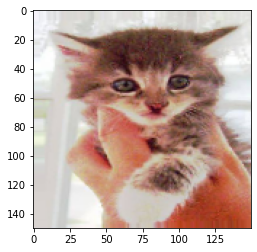

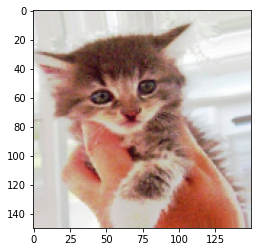

In [22]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for 
                 fname in os.listdir(train_cats_dir)])

# index 3의 이미지를 증식한다
img_path = fnames[3]

# 이미지를 읽어서 크기 변경
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환
x = image.img_to_array(img)
#(1, 150, 150, 3) 크기로 변환
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### 드롭아웃 추가

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [42]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# 검증 데이터는 증식 금지
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//validation_generator.batch_size
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/5
62/62 [==============================] - 39s 626ms/step - loss: 0.5278 - acc: 0.7368 - val_loss: 0.5050 - val_acc: 0.7540
Epoch 2/5
62/62 [==============================] - 38s 604ms/step - loss: 0.5187 - acc: 0.7358 - val_loss: 0.4922 - val_acc: 0.7530
Epoch 3/5
62/62 [==============================] - 38s 618ms/step - loss: 0.4981 - acc: 0.7546 - val_loss: 0.5187 - val_acc: 0.7520
Epoch 4/5
62/62 [==============================] - 39s 623ms/step - loss: 0.4992 - acc: 0.7556 - val_loss: 0.4842 - val_acc: 0.7601
Epoch 5/5
62/62 [==============================] - 37s 601ms/step - loss: 0.5024 - acc: 0.7556 - val_loss: 0.5071 - val_acc: 0.7500


In [38]:
train_generator.samples, train_generator.batch_size

(2000, 32)

In [39]:
validation_generator.samples, validation_generator.batch_size

(1000, 32)

In [ ]:
model.save('cats_and_dogs_small_2.h5')

### 다시 훈련의 정확도, 손실 그래프 그리기

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()